Reading the dataset

In [1]:
import pandas as pd

df = pd.read_csv('cars.csv')

df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [2]:
df['price_usd'].describe()

count    38531.000000
mean      6639.971021
std       6428.152018
min          1.000000
25%       2100.000000
50%       4800.000000
75%       8990.000000
max      50000.000000
Name: price_usd, dtype: float64

At first glance, i can see that the standard deviation is gigantic

In [3]:
df['price_usd'].median()

4800.0

The median confirms this as well given that it's very different from the mean

<AxesSubplot:ylabel='Frequency'>

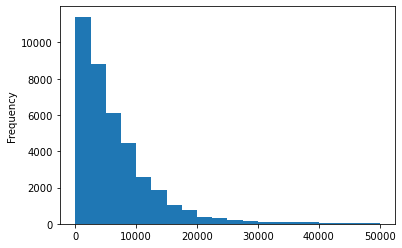

In [4]:
df['price_usd'].plot.hist(bins=20)

The histogram shows and confirms a clear bias

Analyzing my favorite brand, engine, transmission, and year

In [11]:
honda_df = df[(df['manufacturer_name'] == 'Honda') & (df['year_produced'] <= 2000) & (df['transmission'] == 'mechanical') & (df['engine_capacity'] >= 2.0)]

honda_df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
33190,Honda,Accord,mechanical,black,297000,1996,gasoline,False,gasoline,2.2,...,True,False,False,True,False,False,False,False,True,14
33204,Honda,Prelude,mechanical,blue,350000,1998,gasoline,False,gasoline,2.0,...,True,True,False,False,False,False,False,True,True,102
33214,Honda,Accord,mechanical,black,300000,1995,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,False,45
33230,Honda,Accord,mechanical,blue,23000,1994,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,True,174
33236,Honda,Accord,mechanical,black,416000,1993,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,True,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33921,Honda,Accord,mechanical,silver,450000,1995,gasoline,False,gasoline,2.0,...,False,True,False,True,False,False,True,False,True,111
33930,Honda,Accord,mechanical,other,400000,1994,gasoline,False,gasoline,2.2,...,True,False,False,True,True,False,False,False,True,133
33943,Honda,Accord,mechanical,red,290000,1994,gasoline,False,gasoline,2.2,...,True,False,False,True,False,False,False,False,True,158
33949,Honda,Accord,mechanical,white,222222,1990,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,True,168


Let's see how the price behaves

<AxesSubplot:ylabel='Frequency'>

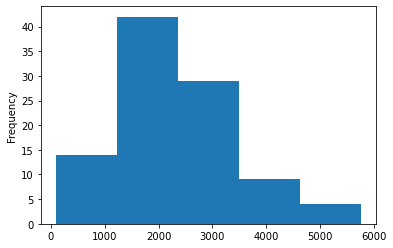

In [13]:
honda_df['price_usd'].plot.hist(bins=5)

I can see a bias towards the left side, and the mean is probably around 2000, let's check it

In [14]:
honda_df['price_usd'].describe()

count      98.000000
mean     2298.655918
std      1086.236006
min       100.000000
25%      1500.000000
50%      2000.000000
75%      3000.000000
max      5750.000000
Name: price_usd, dtype: float64

My suspicions were confirmed

So the type of cars that I like, are they relatively cheap compared to the original df?

In [15]:
percent = (df['price_usd'].mean() - honda_df['price_usd'].mean()) / df['price_usd'].mean() * 100

In [16]:
percent

65.38153689211926

It's 65.38% cheaper, nice.